In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('us_income.csv')

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

we see that there are no null values are present.

In [6]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

wee see that our target variable income is only two condotion so we get decision that this is classification method.

In [7]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


we see that there are some object so we convet to the int.

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
df1=df.select_dtypes(object)

In [11]:
df1

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [12]:
for i in df1:
    le=LabelEncoder()
    df1[i]=le.fit_transform(df1[i])

In [13]:
df1

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,6,9,2,4,0,4,1,39,0
1,4,11,0,6,1,4,1,39,0
2,4,1,2,6,0,2,1,39,0
3,4,9,2,10,5,2,0,5,0
4,4,12,2,4,5,4,0,39,0
...,...,...,...,...,...,...,...,...,...
32555,4,7,2,13,5,4,0,39,0
32556,4,11,2,7,0,4,1,39,1
32557,4,11,6,1,4,4,0,39,0
32558,4,11,4,1,3,4,1,39,0


In [16]:
df2=df.select_dtypes(int)

In [17]:
df2

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [18]:
df=pd.concat([df1 , df2], axis=1)

In [19]:
df

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,6,9,2,4,0,4,1,39,0,50,83311,13,0,0,13
1,4,11,0,6,1,4,1,39,0,38,215646,9,0,0,40
2,4,1,2,6,0,2,1,39,0,53,234721,7,0,0,40
3,4,9,2,10,5,2,0,5,0,28,338409,13,0,0,40
4,4,12,2,4,5,4,0,39,0,37,284582,14,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,4,7,2,13,5,4,0,39,0,27,257302,12,0,0,38
32556,4,11,2,7,0,4,1,39,1,40,154374,9,0,0,40
32557,4,11,6,1,4,4,0,39,0,58,151910,9,0,0,40
32558,4,11,4,1,3,4,1,39,0,22,201490,9,0,0,20


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Workclass       32560 non-null  int32
 1   Education       32560 non-null  int32
 2   Marital_status  32560 non-null  int32
 3   Occupation      32560 non-null  int32
 4   Relationship    32560 non-null  int32
 5   Race            32560 non-null  int32
 6   Sex             32560 non-null  int32
 7   Native_country  32560 non-null  int32
 8   Income          32560 non-null  int32
 9   Age             32560 non-null  int64
 10  Fnlwgt          32560 non-null  int64
 11  Education_num   32560 non-null  int64
 12  Capital_gain    32560 non-null  int64
 13  Capital_loss    32560 non-null  int64
 14  Hours_per_week  32560 non-null  int64
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


we see that our all the data in the numaric form.so we fertur process that.

we visualize the data

<AxesSubplot:xlabel='Workclass', ylabel='Income'>

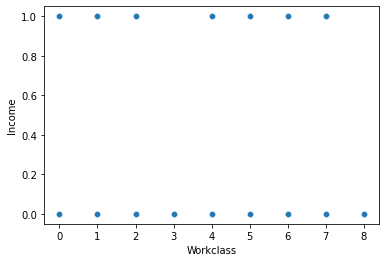

In [21]:
import seaborn as sns
sns.scatterplot(x='Workclass', y='Income', data=df)

0    24719
1     7841
Name: Income, dtype: int64


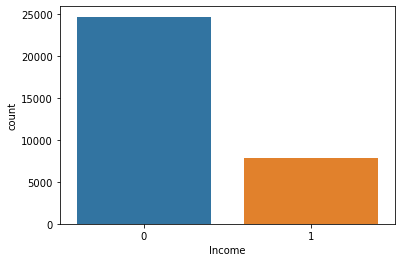

In [27]:
sns.countplot('Income', data=df)
print(df['Income'].value_counts())

we see that the people are mostly income is greather than 50k.

4    22696
6     2541
2     2093
0     1836
7     1297
5     1116
1      960
8       14
3        7
Name: Workclass, dtype: int64


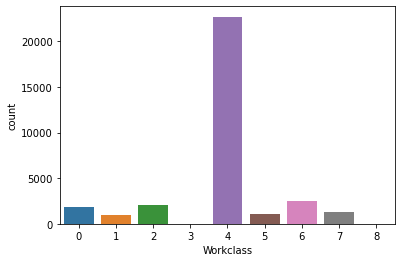

In [28]:
sns.countplot('Workclass', data=df)
print(df['Workclass'].value_counts())

we see that the private job is very high percent in us.

11    10501
15     7291
9      5354
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: Education, dtype: int64


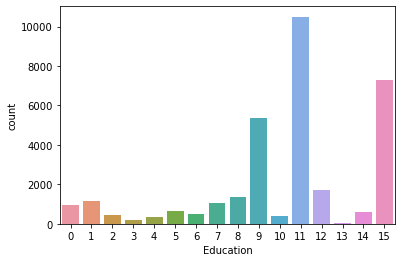

In [29]:
sns.countplot('Education', data=df)
print(df['Education'].value_counts())

HS graduation are mostly education in US.

2    14976
4    10682
0     4443
5     1025
6      993
3      418
1       23
Name: Marital_status, dtype: int64


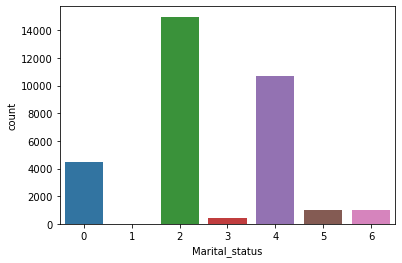

In [30]:
sns.countplot('Marital_status', data=df)
print(df['Marital_status'].value_counts())

the most people are married see in green bar and violent bar sign that the they are not married.

10    4140
3     4099
4     4066
1     3769
12    3650
8     3295
7     2002
0     1843
14    1597
6     1370
5      994
13     928
11     649
9      149
2        9
Name: Occupation, dtype: int64


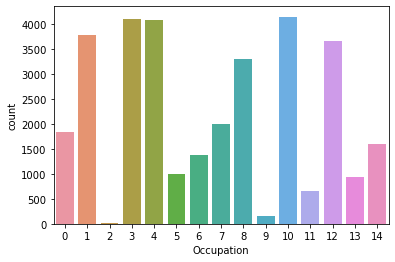

In [31]:
sns.countplot('Occupation', data=df)
print(df['Occupation'].value_counts())

there are lots of occupations.

0    13193
1     8304
3     5068
4     3446
5     1568
2      981
Name: Relationship, dtype: int64


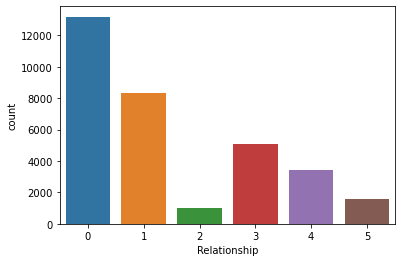

In [32]:
sns.countplot('Relationship', data=df)
print(df['Relationship'].value_counts())

the relationship is mostly a husbund.

4    27815
2     3124
1     1039
0      311
3      271
Name: Race, dtype: int64


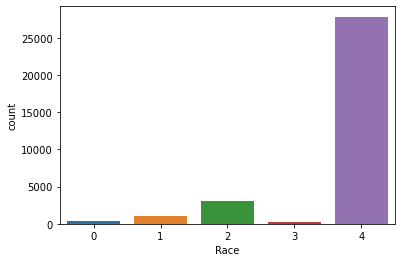

In [33]:
sns.countplot('Race', data=df)
print(df['Race'].value_counts())

white people are most in the dataset.

1    21789
0    10771
Name: Sex, dtype: int64


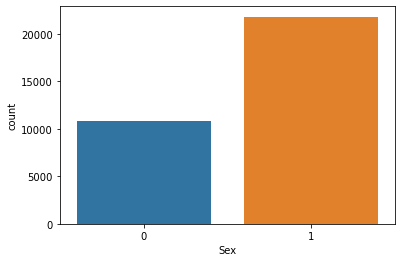

In [34]:
sns.countplot('Sex', data=df)
print(df['Sex'].value_counts())

we see that the male are 2* more than the womens.

39    29169
26      643
0       583
30      198
11      137
2       121
33      114
8       106
19      100
5        95
9        90
23       81
35       80
3        75
22       73
6        70
40       67
13       64
24       62
31       60
4        59
36       51
14       44
20       43
32       37
27       34
29       31
10       29
12       29
7        28
21       24
17       20
1        19
38       19
25       18
37       18
41       16
28       14
16       13
18       13
34       12
15        1
Name: Native_country, dtype: int64


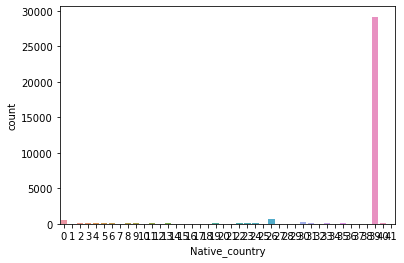

In [35]:
sns.countplot('Native_country', data=df)
print(df['Native_country'].value_counts())

US is most peoples Native_country

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64


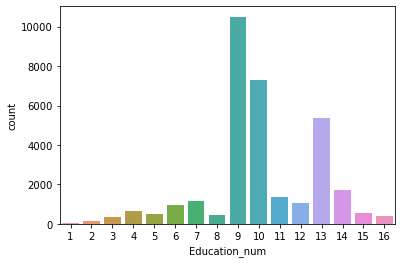

In [36]:
sns.countplot('Education_num', data=df)
print(df['Education_num'].value_counts())

9 and 10 are the most Education_num

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Workclass       32560 non-null  int32
 1   Education       32560 non-null  int32
 2   Marital_status  32560 non-null  int32
 3   Occupation      32560 non-null  int32
 4   Relationship    32560 non-null  int32
 5   Race            32560 non-null  int32
 6   Sex             32560 non-null  int32
 7   Native_country  32560 non-null  int32
 8   Income          32560 non-null  int32
 9   Age             32560 non-null  int64
 10  Fnlwgt          32560 non-null  int64
 11  Education_num   32560 non-null  int64
 12  Capital_gain    32560 non-null  int64
 13  Capital_loss    32560 non-null  int64
 14  Hours_per_week  32560 non-null  int64
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


<AxesSubplot:xlabel='Income', ylabel='Workclass'>

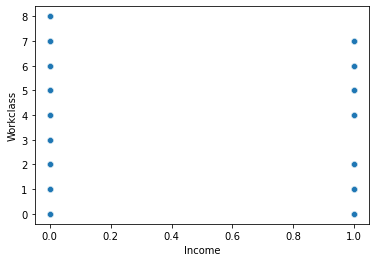

In [39]:
sns.scatterplot(x='Income',y='Workclass',data=df)

<AxesSubplot:xlabel='Education', ylabel='Race'>

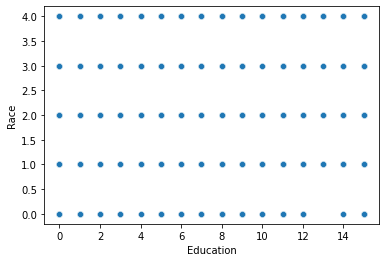

In [41]:
sns.scatterplot(x='Education',y='Race',data=df)

<AxesSubplot:xlabel='Age', ylabel='Hours_per_week'>

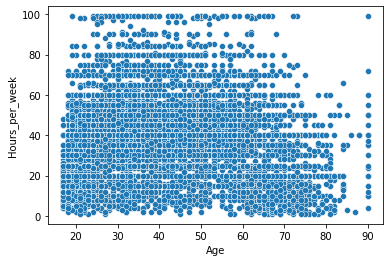

In [42]:
sns.scatterplot(x='Age',y='Hours_per_week',data=df)

<AxesSubplot:xlabel='Age', ylabel='Race'>

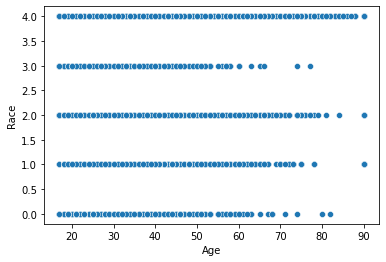

In [43]:
sns.scatterplot(x='Age',y='Race',data=df)

# Describtion of data

In [44]:
df.describe()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,3.868796,10.298249,2.611794,6.572912,1.446376,3.665848,0.669195,36.718796,0.240817,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,1.455879,3.870317,1.506225,4.228809,1.606794,0.848817,0.470510,7.823892,0.427586,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,39.000000,0.000000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,4.000000,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,39.000000,0.000000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,39.000000,0.000000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,8.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,41.000000,1.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# correlation

In [45]:
df.corr()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Workclass,1.000000,0.023537,-0.064798,0.255004,-0.090449,0.049720,0.095942,-0.007710,0.051645,0.003786,-0.016587,0.052015,0.033828,0.012231,0.138974
Education,0.023537,1.000000,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.064291,0.079311,-0.010508,-0.028156,0.359172,0.030047,0.016744,0.055510
Marital_status,-0.064798,-0.038398,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.023827,-0.199295,-0.266292,0.028184,-0.069338,-0.043398,-0.034182,-0.190521
Occupation,0.255004,-0.021274,-0.009617,1.000000,-0.075620,0.006779,0.080328,-0.012532,0.075448,-0.020946,0.001554,0.109748,0.025511,0.017979,0.080384
Relationship,-0.090449,-0.010879,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.005504,-0.250924,-0.263698,0.008922,-0.094145,-0.057918,-0.061064,-0.248975
Race,0.049720,0.014135,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.137849,0.071853,0.028718,-0.021278,0.031825,0.011143,0.018902,0.041910
Sex,0.095942,-0.027349,-0.129337,0.080328,-0.582453,0.087197,1.000000,-0.008125,0.215995,0.088832,0.026882,0.012256,0.048477,0.045572,0.229312
Native_country,-0.007710,0.064291,-0.023827,-0.012532,-0.005504,0.137849,-0.008125,1.000000,0.015845,-0.001151,-0.051957,0.050831,-0.001984,0.000420,-0.002671
Income,0.051645,0.079311,-0.199295,0.075448,-0.250924,0.071853,0.215995,0.015845,1.000000,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690
Age,0.003786,-0.010508,-0.266292,-0.020946,-0.263698,0.028718,0.088832,-0.001151,0.234039,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756


we see the correlation of each columns.

<AxesSubplot:>

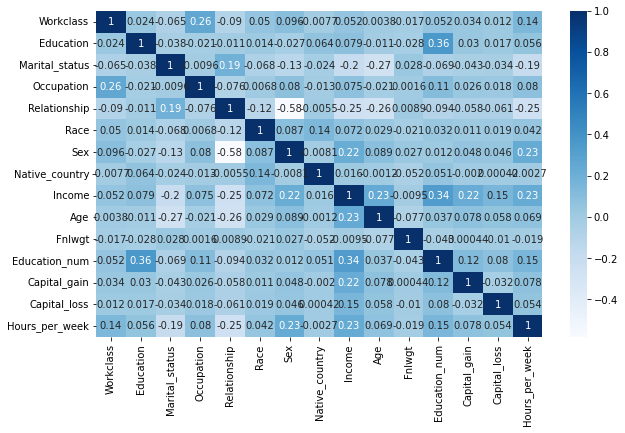

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='Blues', annot=True)

our target variable is income so we focus on that.

In [48]:
df.corr()['Income']

Workclass         0.051645
Education         0.079311
Marital_status   -0.199295
Occupation        0.075448
Relationship     -0.250924
Race              0.071853
Sex               0.215995
Native_country    0.015845
Income            1.000000
Age               0.234039
Fnlwgt           -0.009481
Education_num     0.335182
Capital_gain      0.223333
Capital_loss      0.150523
Hours_per_week    0.229690
Name: Income, dtype: float64

we see that the correlation of incometo each columns are not very good 

# skewness

In [49]:
df.skew()

Workclass         -0.752280
Education         -0.934063
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Native_country    -3.658235
Income             1.212383
Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

thw skewness between +-0.80 is good skewness

<AxesSubplot:xlabel='Workclass', ylabel='Density'>

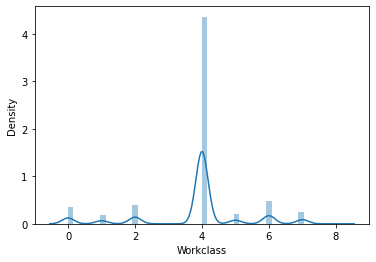

In [51]:
sns.distplot(df['Workclass'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

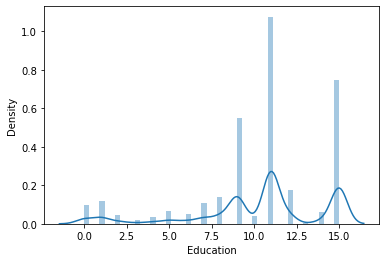

In [52]:
sns.distplot(df['Education'])

<AxesSubplot:xlabel='Marital_status', ylabel='Density'>

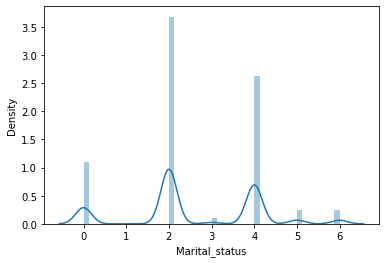

In [53]:
sns.distplot(df['Marital_status'])

<AxesSubplot:xlabel='Occupation', ylabel='Density'>

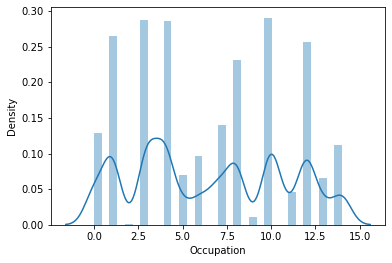

In [54]:
sns.distplot(df['Occupation'])

<AxesSubplot:xlabel='Relationship', ylabel='Density'>

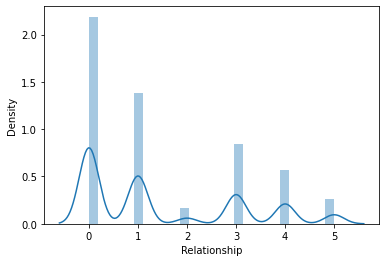

In [55]:
sns.distplot(df['Relationship'])

<AxesSubplot:xlabel='Race', ylabel='Density'>

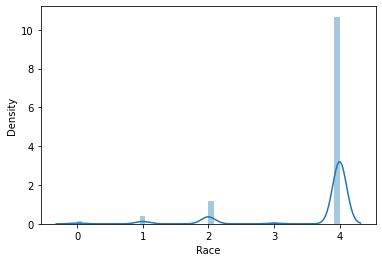

In [56]:
sns.distplot(df['Race'])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

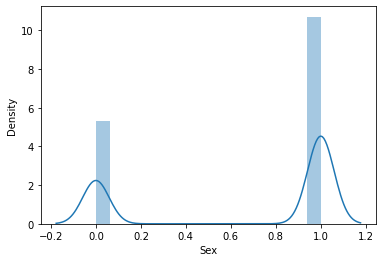

In [57]:
sns.distplot(df['Sex'])

<AxesSubplot:xlabel='Native_country', ylabel='Density'>

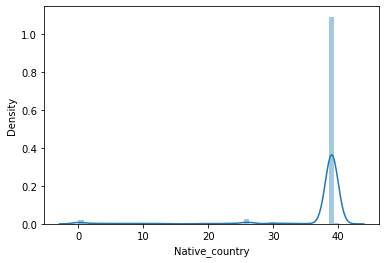

In [58]:
sns.distplot(df['Native_country'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

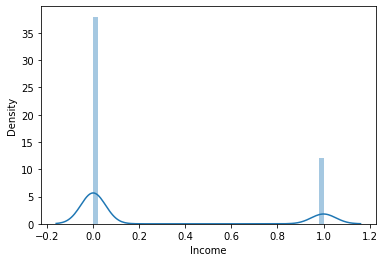

In [59]:
sns.distplot(df['Income'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

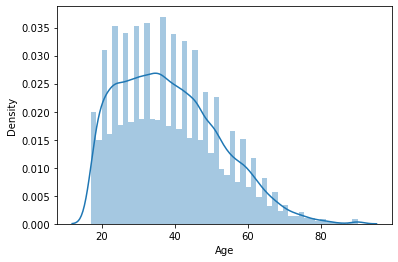

In [60]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

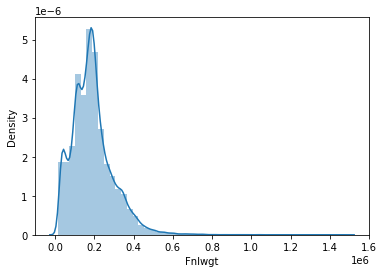

In [61]:
sns.distplot(df['Fnlwgt'])

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

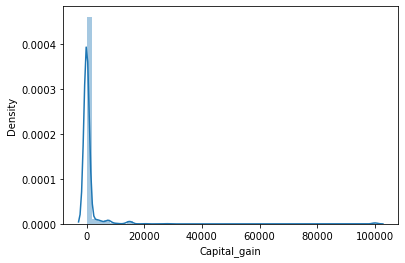

In [62]:
sns.distplot(df['Capital_gain'])

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

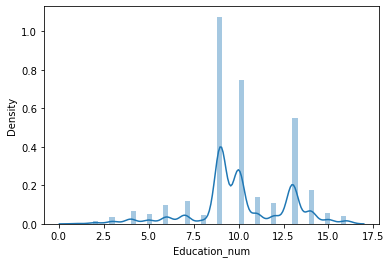

In [63]:
sns.distplot(df['Education_num'])

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

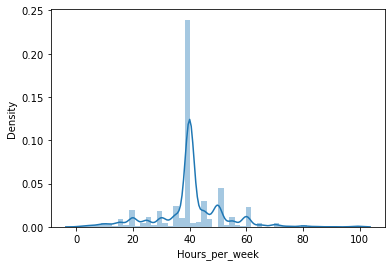

In [64]:
sns.distplot(df['Hours_per_week'])

(array([  736.,  2192.,  2317., 17734.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

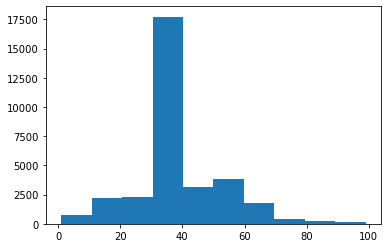

In [65]:
plt.hist('Hours_per_week',data=df, bins=10)

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7077.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

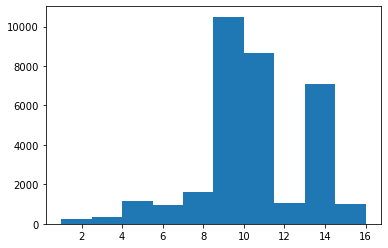

In [66]:
plt.hist('Education_num',data=df, bins=10)

we see the outliers so get the box plot

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Workclass       32560 non-null  int32
 1   Education       32560 non-null  int32
 2   Marital_status  32560 non-null  int32
 3   Occupation      32560 non-null  int32
 4   Relationship    32560 non-null  int32
 5   Race            32560 non-null  int32
 6   Sex             32560 non-null  int32
 7   Native_country  32560 non-null  int32
 8   Income          32560 non-null  int32
 9   Age             32560 non-null  int64
 10  Fnlwgt          32560 non-null  int64
 11  Education_num   32560 non-null  int64
 12  Capital_gain    32560 non-null  int64
 13  Capital_loss    32560 non-null  int64
 14  Hours_per_week  32560 non-null  int64
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


<AxesSubplot:>

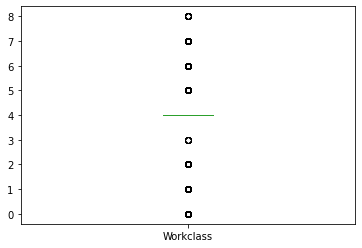

In [69]:
df['Workclass'].plot.box()

outliers are present

<AxesSubplot:>

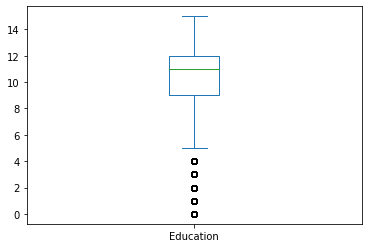

In [70]:
df['Education'].plot.box()

outliers are present

<AxesSubplot:>

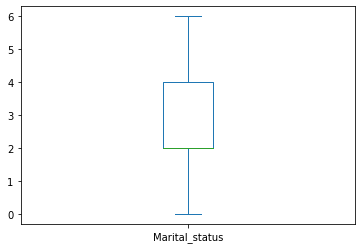

In [72]:
df['Marital_status'].plot.box()

<AxesSubplot:>

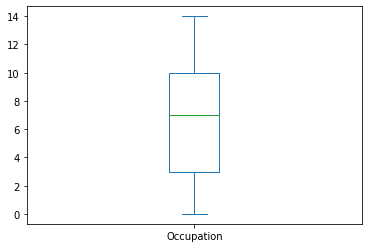

In [74]:
df['Occupation'].plot.box()

<AxesSubplot:>

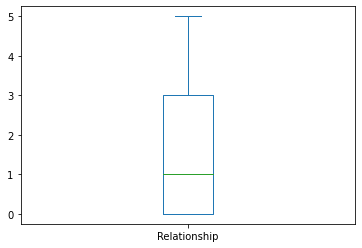

In [75]:
df['Relationship'].plot.box()

<AxesSubplot:>

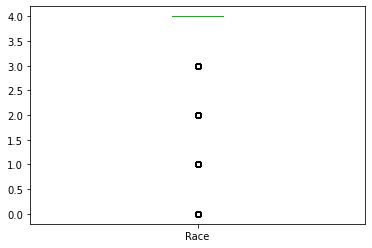

In [76]:
df['Race'].plot.box()

outliers are present

<AxesSubplot:>

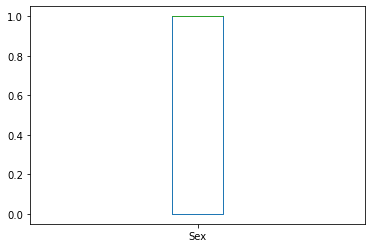

In [77]:
df['Sex'].plot.box()

<AxesSubplot:>

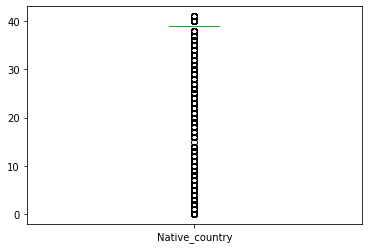

In [78]:
df['Native_country'].plot.box()

outliers are present

<AxesSubplot:>

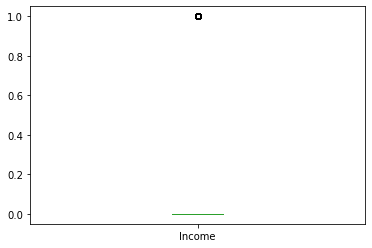

In [79]:
df['Income'].plot.box()

<AxesSubplot:>

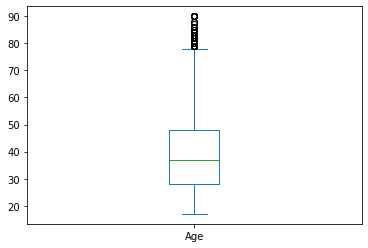

In [81]:
df['Age'].plot.box()

outliers are present

<AxesSubplot:>

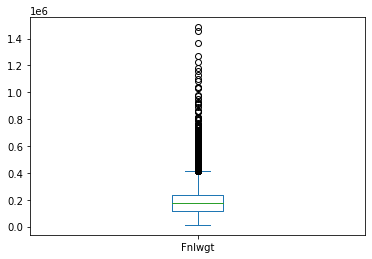

In [82]:
df['Fnlwgt'].plot.box()

outliers are present

<AxesSubplot:>

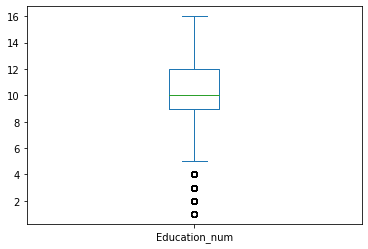

In [83]:
df['Education_num'].plot.box()

outliers are present

<AxesSubplot:>

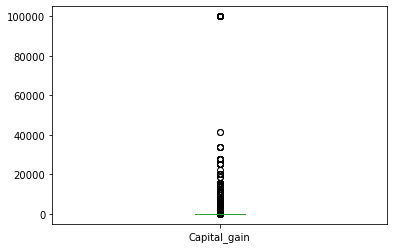

In [84]:
df['Capital_gain'].plot.box()

outliers are present

<AxesSubplot:>

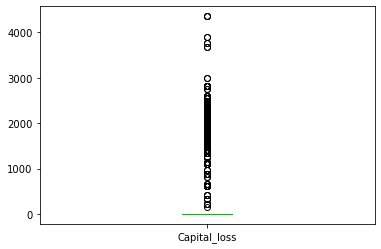

In [85]:
df['Capital_loss'].plot.box()

outliers are present

<AxesSubplot:>

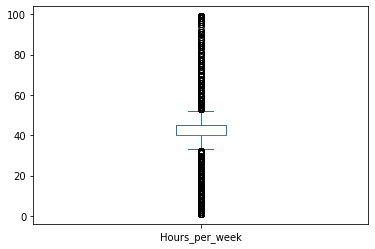

In [86]:
df['Hours_per_week'].plot.box()

outliers are present

# using the zscore removing the outliers.

In [89]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([ 7, 14,  5, ...,  5,  5,  5], dtype=int64))

In [90]:
df1=df[(z<3).all(axis=1)]
df1

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,6,9,2,4,0,4,1,39,0,50,83311,13,0,0,13
1,4,11,0,6,1,4,1,39,0,38,215646,9,0,0,40
2,4,1,2,6,0,2,1,39,0,53,234721,7,0,0,40
4,4,12,2,4,5,4,0,39,0,37,284582,14,0,0,40
5,4,6,3,8,1,2,0,23,0,49,160187,5,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,4,7,2,13,5,4,0,39,0,27,257302,12,0,0,38
32556,4,11,2,7,0,4,1,39,1,40,154374,9,0,0,40
32557,4,11,6,1,4,4,0,39,0,58,151910,9,0,0,40
32558,4,11,4,1,3,4,1,39,0,22,201490,9,0,0,20


In [99]:
df1=df[(z<3).all(axis=1)]
print('old dataframe', df.shape)
print('new dataframe',df1.shape)
print('total dropped rows', df.shape[0]-df1.shape[0])

old dataframe (32560, 15)
new dataframe (27417, 15)
total dropped rows 5143


# percentage loss data

In [100]:
loss_percent=(32560-27417)/32560*100
print(loss_percent, '%')

15.795454545454547 %


In [101]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [102]:
x

array([[ 1.6452641 , -0.53885469, -0.40164314, ..., -0.29704426,
        -0.04054646, -2.2500184 ],
       [ 0.02043118,  0.0143002 , -1.7206208 , ..., -0.29704426,
        -0.04054646, -0.02842845],
       [ 0.02043118, -1.91923437, -0.40164314, ..., -0.29704426,
        -0.04054646, -0.02842845],
       ...,
       [ 0.02043118,  0.0143002 ,  2.2350409 , ..., -0.29704426,
        -0.04054646, -0.02842845],
       [ 0.02043118,  0.0143002 ,  0.91045284, ..., -0.29704426,
        -0.04054646, -1.74035651],
       [ 0.80204545,  0.0143002 , -0.40164314, ...,  3.36650165,
        -0.04054646, -0.02842845]])

In [103]:
y

0        0
1        0
2        0
4        0
5        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 27417, dtype: int32

In [104]:
pd.DataFrame(x).skew()

0      0.036929
1     -0.051002
2     -0.044351
3     -0.041958
4      0.057919
5     -2.533432
6     -0.684115
7      5.689972
8      0.008656
9      0.014425
10    -0.118886
11     3.069625
12    24.623864
13     0.016155
dtype: float64

In [105]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.6452641 , -0.53885469, -0.40164314, ..., -0.29704426,
        -0.04054646, -2.2500184 ],
       [ 0.02043118,  0.0143002 , -1.7206208 , ..., -0.29704426,
        -0.04054646, -0.02842845],
       [ 0.02043118, -1.91923437, -0.40164314, ..., -0.29704426,
        -0.04054646, -0.02842845],
       ...,
       [ 0.02043118,  0.0143002 ,  2.2350409 , ..., -0.29704426,
        -0.04054646, -0.02842845],
       [ 0.02043118,  0.0143002 ,  0.91045284, ..., -0.29704426,
        -0.04054646, -1.74035651],
       [ 0.80204545,  0.0143002 , -0.40164314, ...,  3.36650165,
        -0.04054646, -0.02842845]])

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=87)

In [108]:
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4223
           1       0.68      0.43      0.52      1261

    accuracy                           0.82      5484
   macro avg       0.76      0.68      0.71      5484
weighted avg       0.81      0.82      0.81      5484



# cross validation score for logistic regression

In [110]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print('At cv', j)
    print('cross validation score is ',lsc*100)
    print('accuracy score is', lss*100)
    print('\n')

At cv 2
cross validation score is  82.87924107543382
accuracy score is 82.20277169948942


At cv 3
cross validation score is  82.84640916219863
accuracy score is 82.20277169948942


At cv 4
cross validation score is  82.86830436719431
accuracy score is 82.20277169948942


At cv 5
cross validation score is  82.89748513840205
accuracy score is 82.20277169948942


At cv 6
cross validation score is  82.87194854359741
accuracy score is 82.20277169948942


At cv 7
cross validation score is  82.89019070415632
accuracy score is 82.20277169948942


At cv 8
cross validation score is  82.90844757926534
accuracy score is 82.20277169948942


At cv 9
cross validation score is  82.87562005226883
accuracy score is 82.20277169948942




In [111]:
# select on cv value
lsscore_selected=cross_val_score(lr,x,y,cv=6).mean()
print('the cv score is-',lsscore_selected,'\n the accuracy score is-',lss)

the cv score is- 0.8287194854359741 
 the accuracy score is- 0.8220277169948942


# AUC ROC Curve

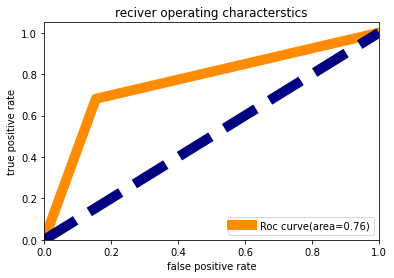

In [112]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds=roc_curve(pred_test, y_test)
roc_auc =auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=10,label='Roc curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('reciver operating characterstics')
plt.legend(loc='lower right')
plt.show()

since the model without outliers performing well we will select that dataframe.

In [113]:
import pickle
filename='income.pkl'
pickle.dump(lr, open(filename, 'wb'))

conclusion

In [114]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({'original':a, 'predicted':predicted}, index=range(len(a)))
df_comA

,original,predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5479,0,0
5480,1,0
5481,0,0
5482,0,0


# our project will done..

# next is for only practice.

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [121]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train, y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    print('accuracy',acc,'random state',i)

if acc>maxAccu:
    maxAccu=acc
    maxRS=i

accuracy 0.8322392414296135 random state 1
accuracy 0.8347921225382933 random state 2
accuracy 0.8298687089715536 random state 3
accuracy 0.8282275711159738 random state 4
accuracy 0.8260393873085339 random state 5
accuracy 0.8278628738147338 random state 6
accuracy 0.8326039387308534 random state 7
accuracy 0.8284099197665937 random state 8
accuracy 0.8313274981765135 random state 9
accuracy 0.8234865061998541 random state 10
accuracy 0.8284099197665937 random state 11
accuracy 0.8267687819110139 random state 12
accuracy 0.824945295404814 random state 13
accuracy 0.8242159008023341 random state 14
accuracy 0.824945295404814 random state 15
accuracy 0.8269511305616338 random state 16
accuracy 0.825309992706054 random state 17
accuracy 0.8289569657184537 random state 18
accuracy 0.8192924872355944 random state 19
accuracy 0.8278628738147338 random state 20
accuracy 0.825309992706054 random state 21
accuracy 0.8284099197665937 random state 22
accuracy 0.8335156819839533 random state 23
a

accuracy 0.8238512035010941 random state 187
accuracy 0.8309628008752735 random state 188
accuracy 0.8389861415025529 random state 189
accuracy 0.8360685630926331 random state 190
accuracy 0.8225747629467542 random state 191
accuracy 0.8304157549234136 random state 192
accuracy 0.8344274252370533 random state 193
accuracy 0.825309992706054 random state 194
accuracy 0.8231218088986142 random state 195
accuracy 0.8309628008752735 random state 196
accuracy 0.8313274981765135 random state 197
accuracy 0.8327862873814734 random state 198
accuracy 0.824762946754194 random state 199


In [122]:
print('best accuracy is',maxAccu,'on random state',maxRS)

best accuracy is 0.824762946754194 on random state 199


In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=199)

# Decision tree classifier

In [136]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('accuracy', accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

accuracy 79.61342086068564
[[3678  561]
 [ 557  688]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4239
           1       0.55      0.55      0.55      1245

    accuracy                           0.80      5484
   macro avg       0.71      0.71      0.71      5484
weighted avg       0.80      0.80      0.80      5484



# Random Forest Classifier

In [138]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('accuracy', accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

accuracy 84.13566739606127
[[3900  339]
 [ 531  714]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4239
           1       0.68      0.57      0.62      1245

    accuracy                           0.84      5484
   macro avg       0.78      0.75      0.76      5484
weighted avg       0.83      0.84      0.84      5484



# Support Vector Classifier

In [140]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
ad_pred=svc.predict(x_test)
print('accuracy', accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

accuracy 83.51568198395331
[[4004  235]
 [ 669  576]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4239
           1       0.71      0.46      0.56      1245

    accuracy                           0.84      5484
   macro avg       0.78      0.70      0.73      5484
weighted avg       0.82      0.84      0.82      5484

